In [2]:
import numpy as np
import matplotlib.pyplot as plt

[1.00000000e+00 9.01282462e-01 8.07693951e-01 7.19234467e-01
 6.35904011e-01 5.57702581e-01 4.84630178e-01 4.16686801e-01
 3.53872452e-01 2.96187130e-01 2.43630835e-01 1.96203567e-01
 1.53905325e-01 1.16736111e-01 8.46959237e-02 5.77847633e-02
 3.60026298e-02 1.93495233e-02 7.82544379e-03 1.43039119e-03
 1.64365549e-04 4.02736686e-03 1.30193951e-02 2.71404504e-02
 4.63905325e-02 7.07696417e-02 1.00277778e-01 1.34914941e-01
 1.74681131e-01 2.19576348e-01 2.69600592e-01 3.24753863e-01
 3.85036160e-01 4.50447485e-01 5.20987837e-01 5.96657216e-01
 6.77455621e-01 7.63383054e-01 8.54439513e-01 9.50625000e-01]


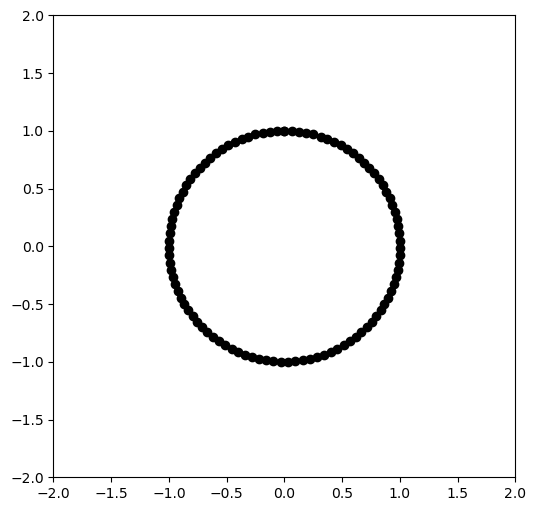

In [3]:
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML
# function to update the axis on each iteration
def aframe(ph):
    # create the transformation matrix
    T = np.array([[1, 1-ph], [0, 1]])
    # apply the transformation to the points using matrix multiplication
    P = T@points
    # update the dots
    plth.set_xdata(P[0,:])
    plth.set_ydata(P[1,:])
    # export the plot handles
    return plth

theta = np.linspace(0,2*np.pi,100)
points = np.vstack((np.sin(theta),np.cos(theta)))
# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))
x = np.linspace(-1,1,20)
plth, = ax.plot(np.cos(x),np.sin(x),'ko')
ax.set_aspect('equal')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1,1-1/40,40)**2
print(phi)
# run animation!
rc('animation', html='jshtml')
#animation.FuncAnimation in colab
animation.FuncAnimation(fig, aframe, phi,
interval=100, repeat=True)

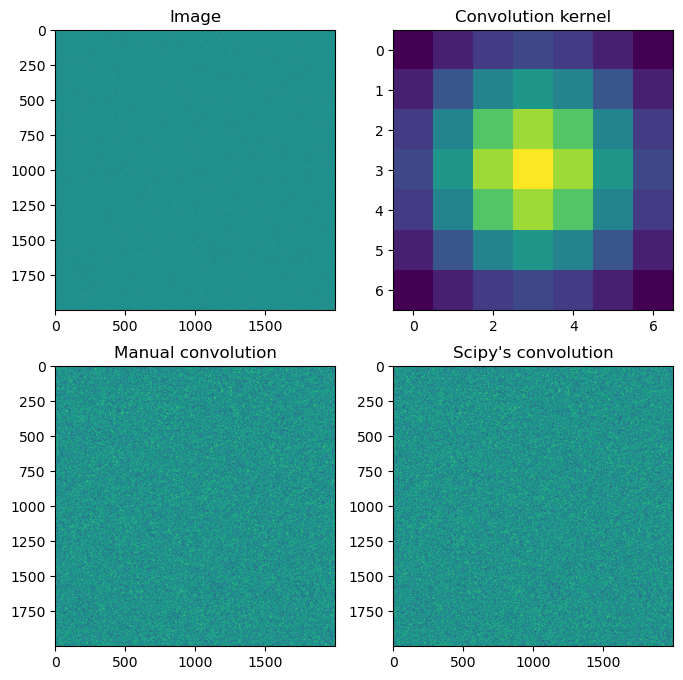

In [ ]:
from scipy.signal import convolve2d

imgN = 200
image = np.random.randn(imgN,imgN)
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp( -(X**2+Y**2)/kernelN )
kernel = kernel / np.sum(kernel)
halfKr = kernelN//2
convoutput = np.zeros((imgN+kernelN- 1,imgN+kernelN-1))
imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr:1,halfKr:-halfKr:1] = image

for rowi in range(halfKr,imgN+halfKr):
    for coli in range(halfKr,imgN+halfKr):
        pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1,coli-halfKr:coli+halfKr+1]
        dotprod = np.sum( pieceOfImg*kernel )
        convoutput[rowi,coli] = dotprod
convoutput = convoutput[halfKr:-halfKr:1,halfKr:-halfKr:1]
convoutput2 = convolve2d(image,kernel,mode='same')

fig,ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].imshow(image)
ax[0,0].set_title('Image')
ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')
ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')
ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")
plt.show()